# Chord Recognition Algorithm

Given a melody line, get the chromagraph and frequencies of the melody line pitches and create an accompanying chord prorgession

In [1]:
# General useful imports
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio

from scipy import signal

%matplotlib inline


# Basic audio parameters

SR = 22050 #  sample rate default for Librosa


# Round to 4 decimal places
def round4(x):
    return np.around(x,4)  

## Code to read melody file and create a chromagraph

In [2]:
def displaySignal(x, sr=SR, title='Signal X'):
    plt.figure(figsize=(12,6))
    plt.title(title)
    plt.plot([0,librosa.get_duration(x)],[0,0],linewidth=1,color='k') # if you want a 0 line
    plt.grid() # gridlines
    librosa.display.waveshow(x,sr=sr)
    plt.show()

In [3]:
# create a dictionary of piano key frequencies

# see https://en.wikipedia.org/wiki/Piano_key_frequencies

notenames = ['A0', 'Bb0', 'B0', 'C1', 'C#1', 'D1', 'Eb1', 'E1', 'F1', 'F#1', 'G1', 'Ab1', 
             'A1', 'Bb1', 'B1', 'C2', 'C#2', 'D2', 'Eb2', 'E2', 'F2', 'F#2', 'G2', 'Ab2', 
             'A2', 'Bb2', 'B2', 'C3', 'C#3', 'D3', 'Eb3', 'E3', 'F3', 'F#3', 'G3', 'Ab3', 
             'A3', 'Bb3', 'B3', 'C4', 'C#4', 'D4', 'Eb4', 'E4', 'F4', 'F#4', 'G4', 'Ab4', 
             'A4', 'Bb4', 'B4', 'C5', 'C#5', 'D5', 'Eb5', 'E5', 'F5', 'F#5', 'G5', 'Ab5',
             'A5', 'Bb5', 'B5', 'C6', 'C#6', 'D6', 'Eb6', 'E6', 'F6', 'F#6', 'G6', 'Ab6', 
             'A6', 'Bb6', 'B6', 'C7', 'C#7', 'D7', 'Eb7', 'E7', 'F7', 'F#7', 'G7', 'Ab7', 
             'A7', 'Bb7', 'B7', 'C8', 'R']

# Create chromatic scale, e.g., as on the piano, as a dictionary    

Freqs = {} 

f = 27.5

for name in notenames:
    Freqs[name] = f
    f *= 2**(1/12)

Freqs['R'] = 0 # a rest (silence) 

### Displays Chorma of signal

https://www.analyticsvidhya.com/blog/2021/06/visualizing-sounds-librosa/

In [4]:
def displayChroma(y, sr=SR):
    chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
    
    # also shows the CQT matrix
    C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
    fig, ax = plt.subplots(nrows=2, sharex=True)
    img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                    y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                    ax=ax[0])
    fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
    ax[0].label_outer()
    img2 = librosa.display.specshow(chroma_orig, y_axis='chroma', x_axis='time', ax=ax[1])
    fig.colorbar(img2, ax=[ax[1]])
    ax[1].set(ylabel='Default chroma')

In [39]:
try:
    x, sr = librosa.load("Chords.m4a")
except:
    x, sr = librosa.load("Chords.ogg")

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


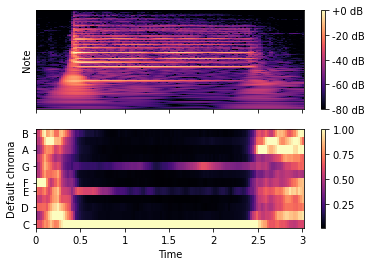

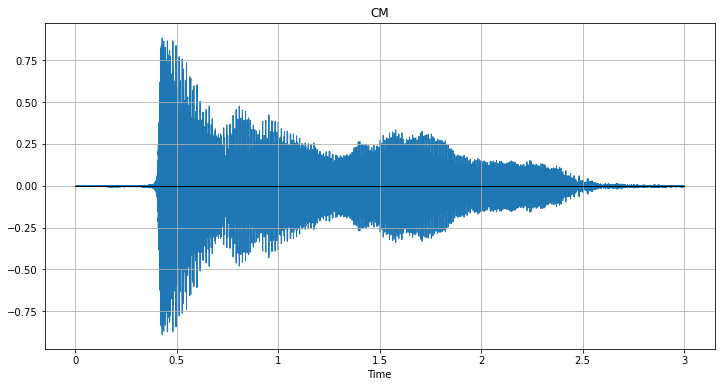

In [6]:
c1 = x[int(4.5*SR):int(7.5*SR)]

displayChroma(y = c1)

displaySignal(c1, title="CM")
Audio(c1, rate=sr)



C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


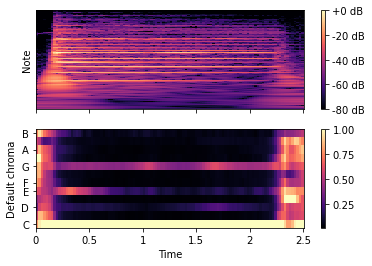

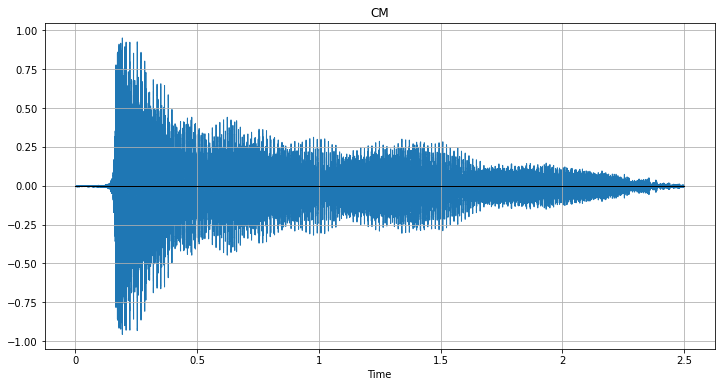

In [7]:
c2 = x[int(7.5*SR):int(10*SR)]

displayChroma(y = c2)

displaySignal(c2, title="CM")
Audio(c2, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=948
  warnings.warn(


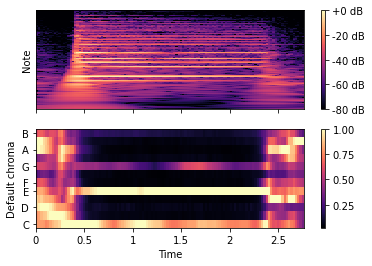

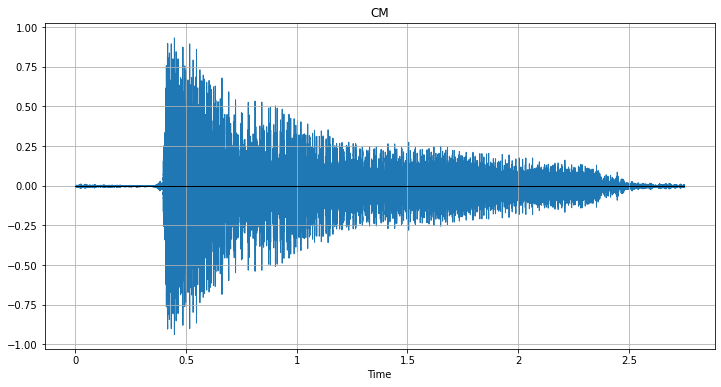

In [8]:
c3 = x[int(10*SR):int(12.75*SR)]

displayChroma(y = c3)

displaySignal(c3, title="CM")
Audio(c3, rate=sr)

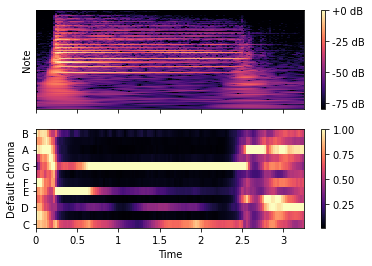

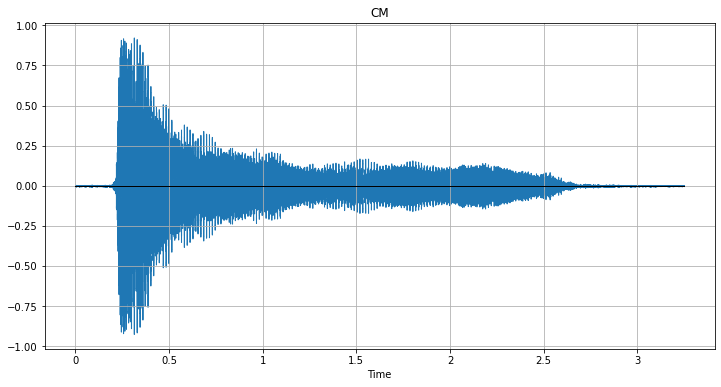

In [9]:
c4 = x[int(12.75*SR):int(16*SR)]

displayChroma(y = c4)

displaySignal(c4, title="CM")
Audio(c4, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


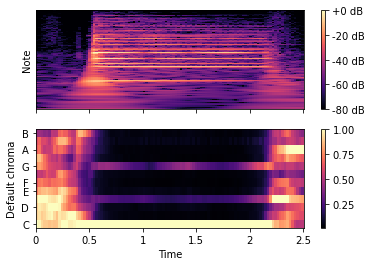

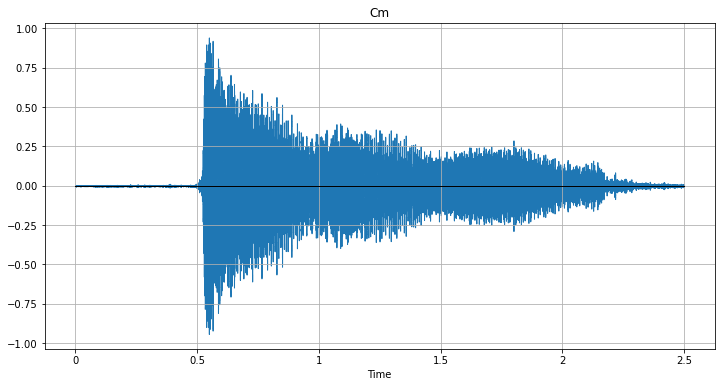

In [10]:
c5 = x[int(20*SR):int(22.5*SR)]

displayChroma(y = c5)

displaySignal(c5, title="Cm")
Audio(c5, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=948
  warnings.warn(


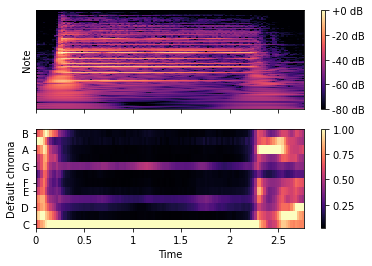

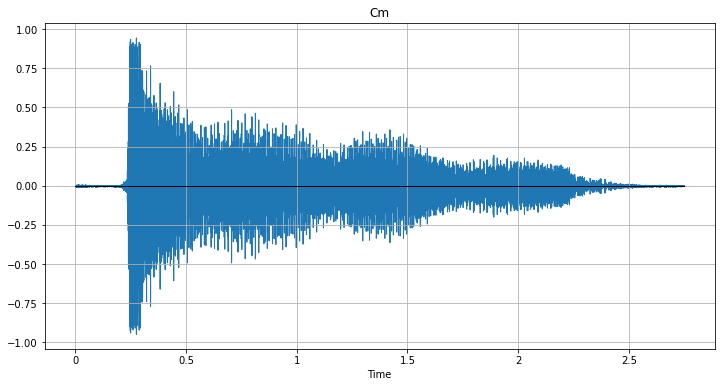

In [11]:
c6 = x[int(22.5*SR):int(25.25*SR)]

displayChroma(y = c6)

displaySignal(c6, title="Cm")
Audio(c6, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


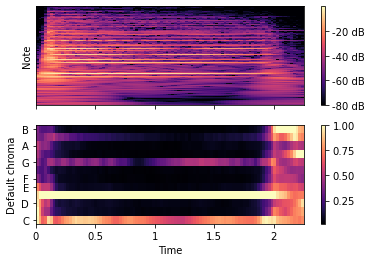

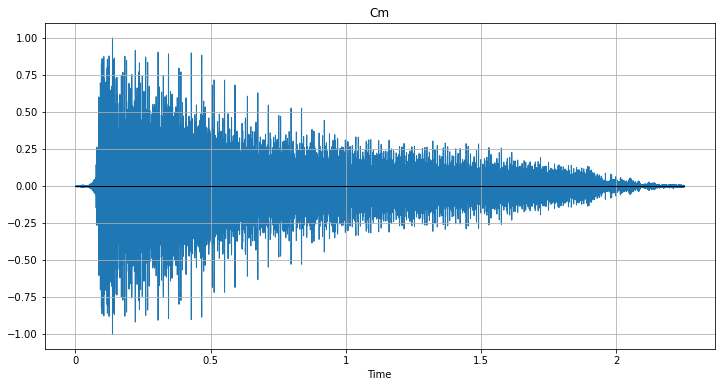

In [12]:
c7 = x[int(25.25*SR):int(27.5*SR)]

displayChroma(y = c7)

displaySignal(c7, title="Cm")
Audio(c7, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


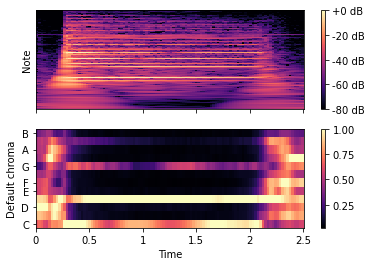

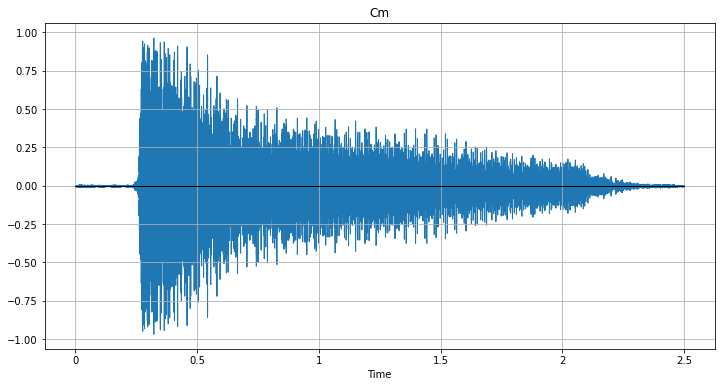

In [13]:
c7_2 = x[int(27.5*SR):int(30*SR)]

displayChroma(y = c7_2)

displaySignal(c7_2, title="Cm")
Audio(c7_2, rate=sr)

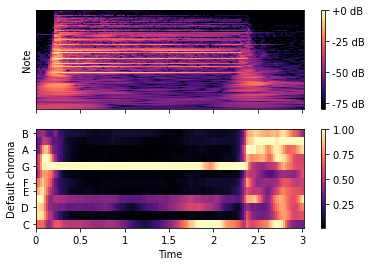

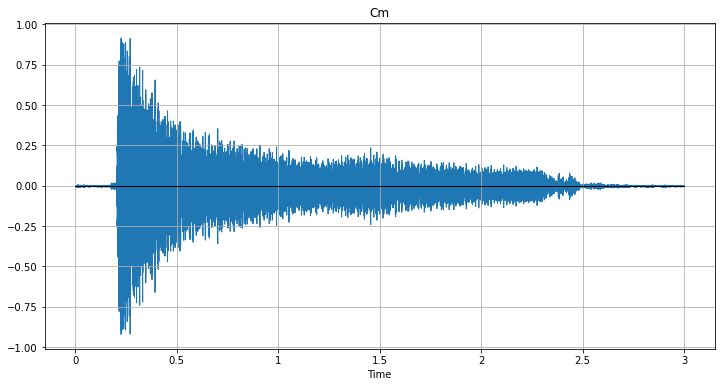

In [14]:
c8 = x[int(30*SR):int(33*SR)]

displayChroma(y = c8)

displaySignal(c8, title="Cm")
Audio(c8, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


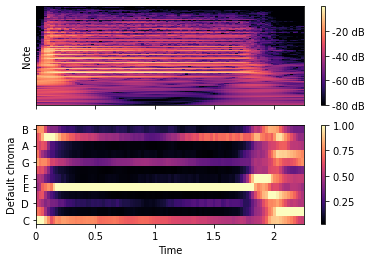

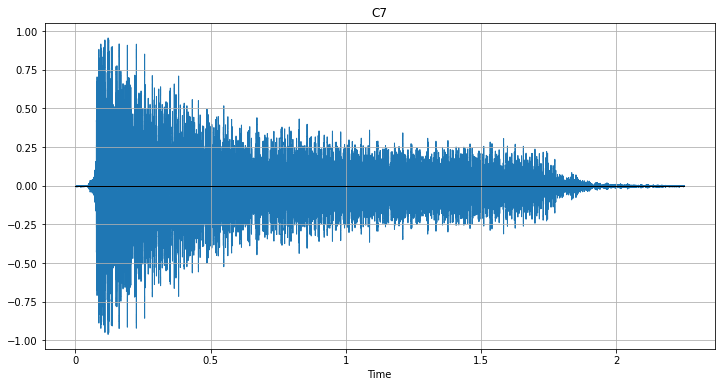

In [15]:
c9 = x[int(35.5*SR):int(37.75*SR)]

displayChroma(y = c9)

displaySignal(c9, title="C7")
Audio(c9, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


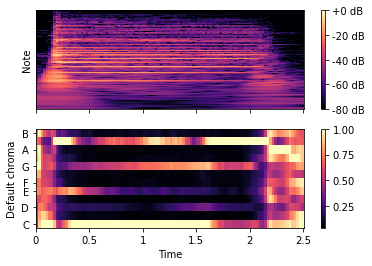

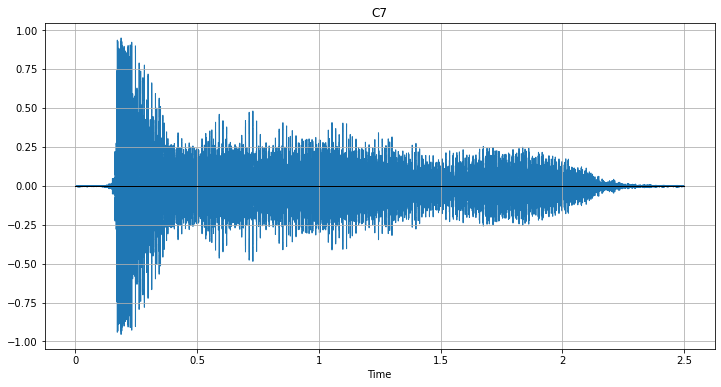

In [16]:
c10 = x[int(37.75*SR):int(40.25*SR)]

displayChroma(y = c10)

displaySignal(c10, title="C7")
Audio(c10, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


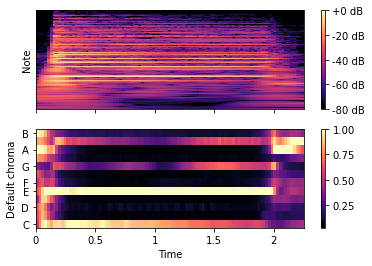

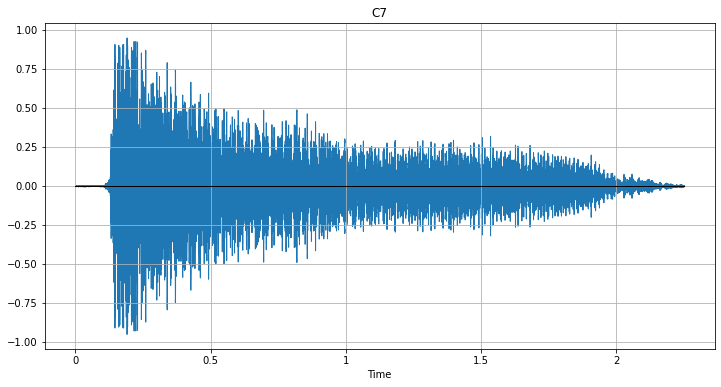

In [17]:
c11 = x[int(40.25*SR):int(42.5*SR)]

displayChroma(y = c11)

displaySignal(c11, title="C7")
Audio(c11, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


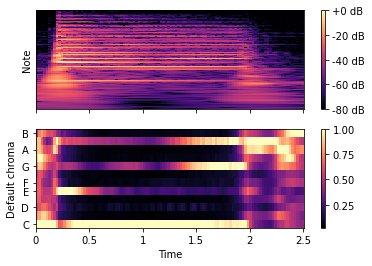

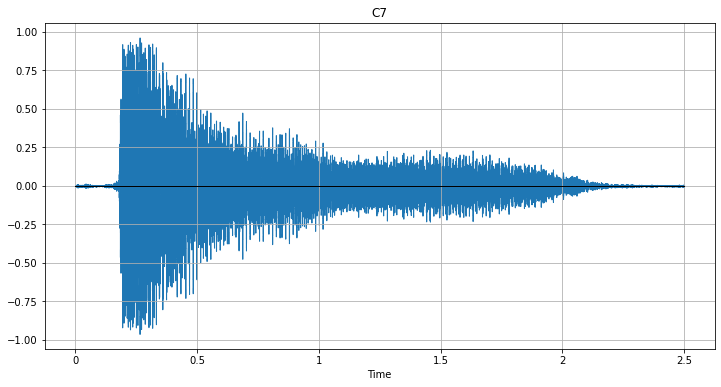

In [18]:
c12 = x[int(42.5*SR):int(45*SR)]

displayChroma(y = c12)

displaySignal(c12, title="C7")
Audio(c12, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


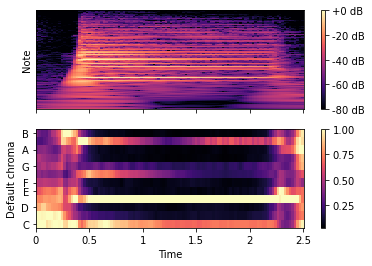

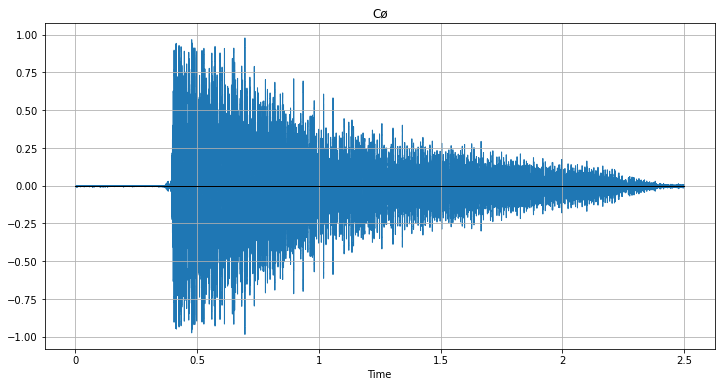

In [19]:
c13 = x[int(47.5*SR):int(50*SR)]

displayChroma(y = c13)

displaySignal(c13, title="Cø")
Audio(c13, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


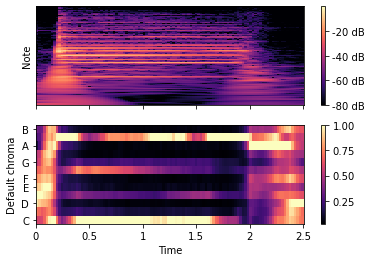

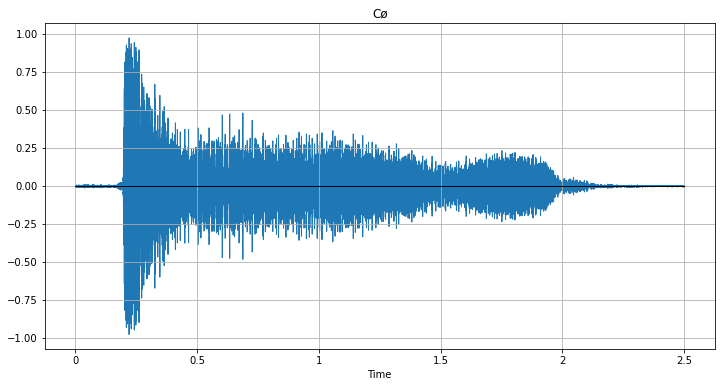

In [20]:
c14 = x[int(50*SR):int(52.5*SR)]

displayChroma(y = c14)

displaySignal(c14, title="Cø")
Audio(c14, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


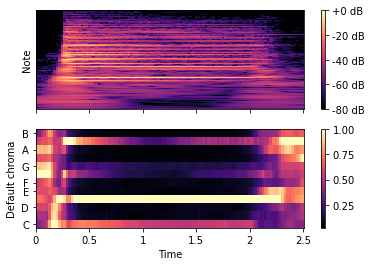

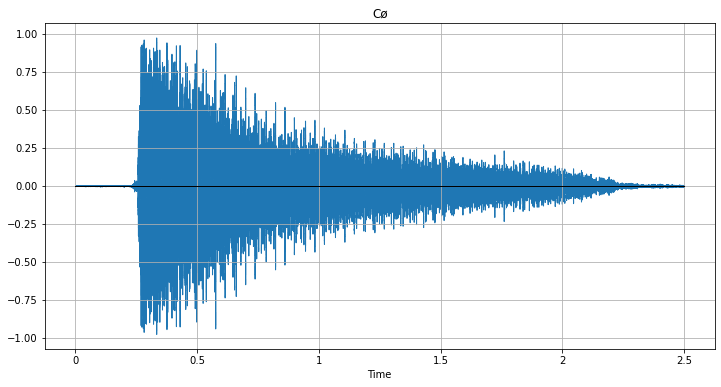

In [21]:
c15 = x[int(52.75*SR):int(55.25*SR)]

displayChroma(y = c15)

displaySignal(c15, title="Cø")
Audio(c15, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=948
  warnings.warn(


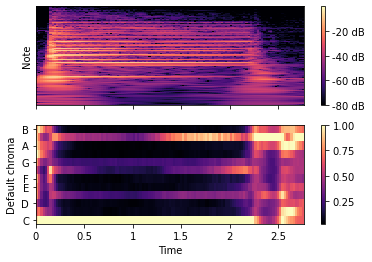

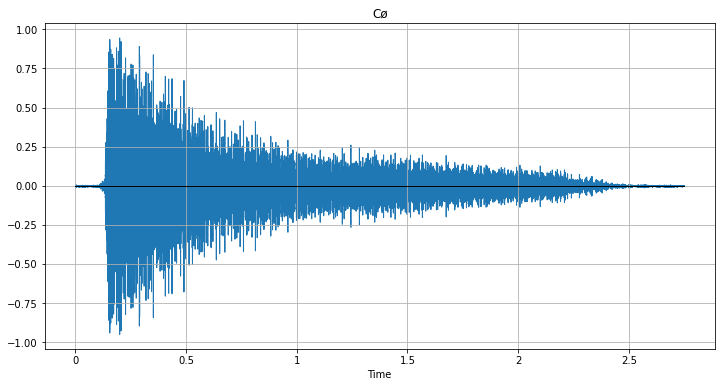

In [22]:
c16 = x[int(55.25*SR):int(58*SR)]

displayChroma(y = c16)

displaySignal(c16, title="Cø")
Audio(c16, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


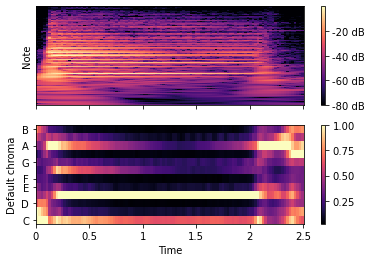

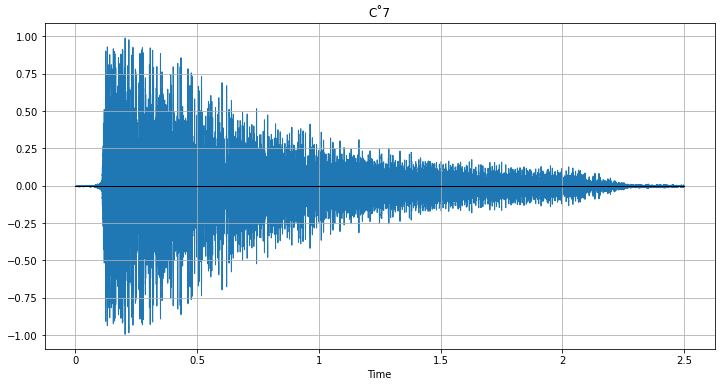

In [23]:
c17 = x[int(58.5*SR):int(61*SR)]

displayChroma(y = c17)

displaySignal(c17, title="C˚7")
Audio(c17, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


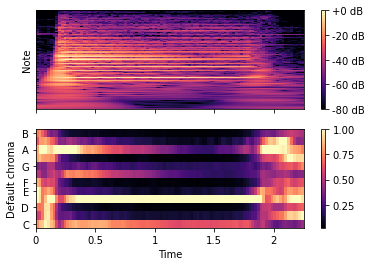

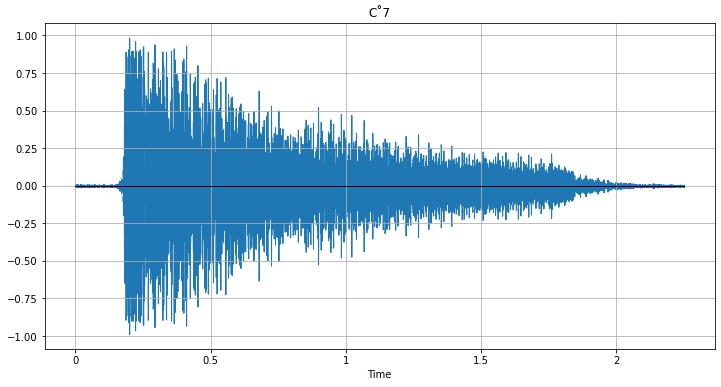

In [24]:
c17_2 = x[int(62.5*SR):int(64.75*SR)]

displayChroma(y = c17_2)

displaySignal(c17_2, title="C˚7")
Audio(c17_2, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


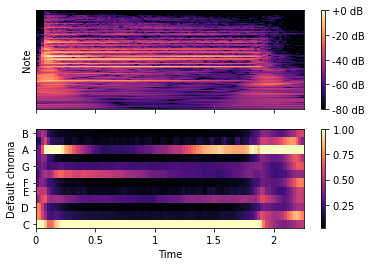

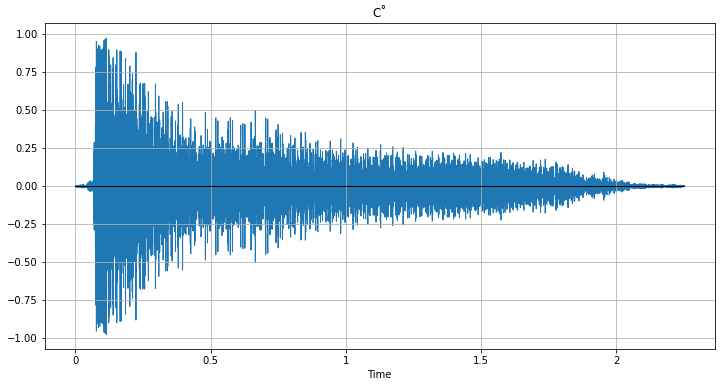

In [25]:
c18 = x[int(64.75*SR):int(67*SR)]

displayChroma(y = c18)

displaySignal(c18, title="C˚")
Audio(c18, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


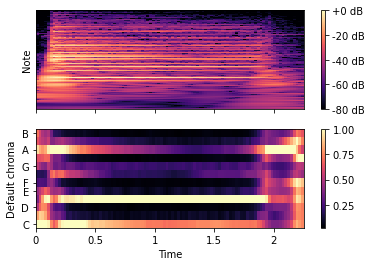

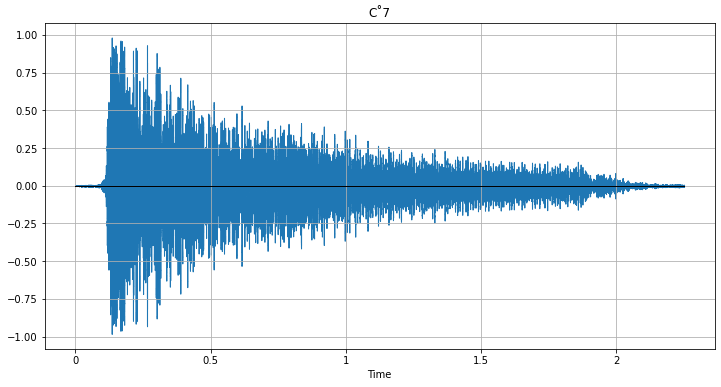

In [26]:
c19 = x[int(67*SR):int(69.25*SR)]

displayChroma(y = c19)

displaySignal(c19, title="C˚7")
Audio(c19, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


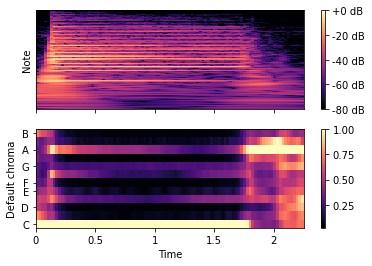

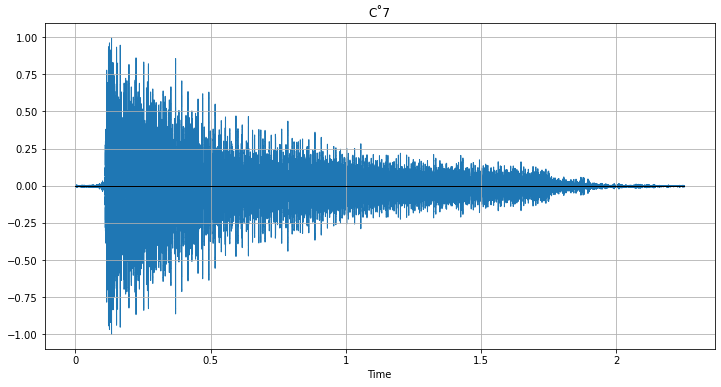

In [27]:
c20 = x[int(69.25*SR):int(71.5*SR)]

displayChroma(y = c20)

displaySignal(c20, title="C˚7")
Audio(c20, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


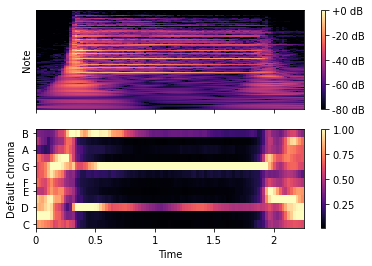

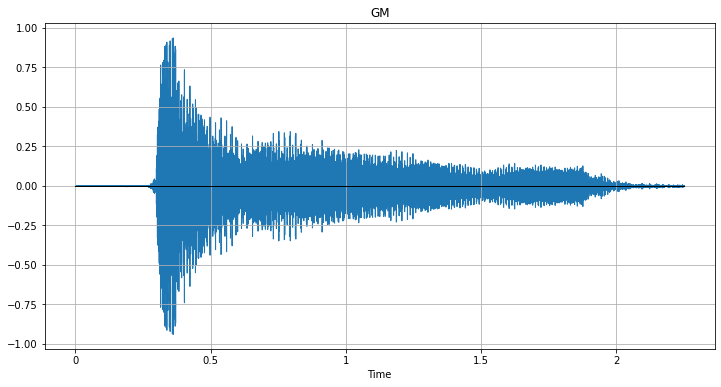

In [28]:
c21 = x[int(74*SR):int(76.25*SR)]

displayChroma(y = c21)

displaySignal(c21, title="GM")
Audio(c21, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=948
  warnings.warn(


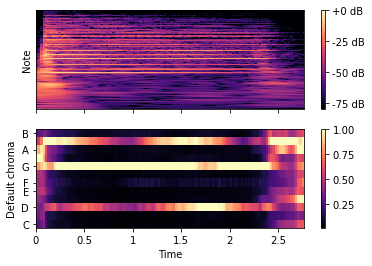

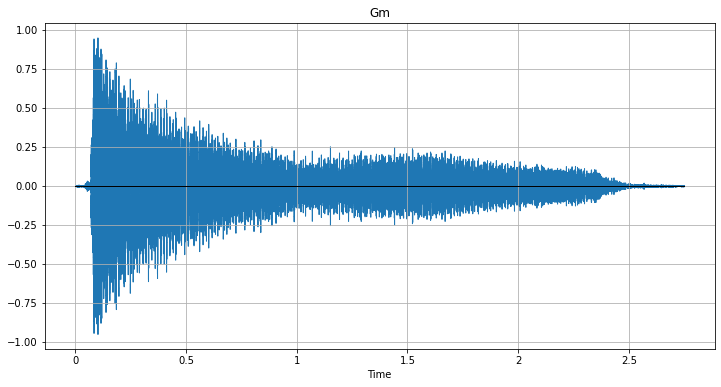

In [29]:
c22 = x[int(76.25*SR):int(79*SR)]

displayChroma(y = c22)

displaySignal(c22, title="Gm")
Audio(c22, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


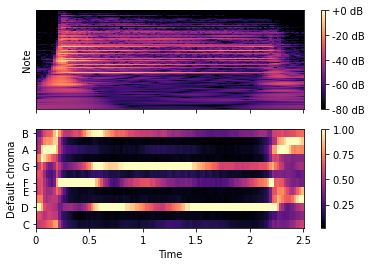

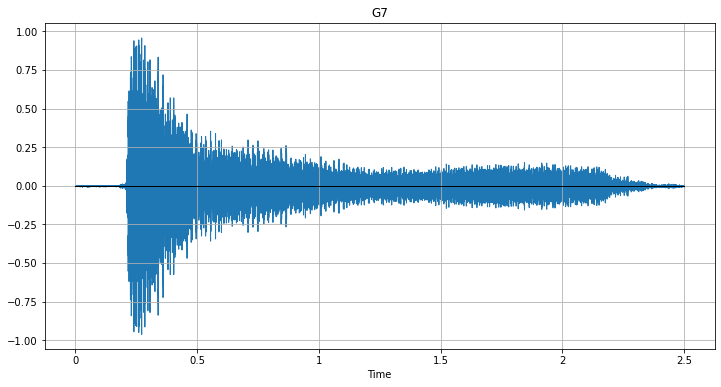

In [30]:
c23 = x[int(79*SR):int(81.5*SR)]

displayChroma(y = c23)

displaySignal(c23, title="G7")
Audio(c23, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


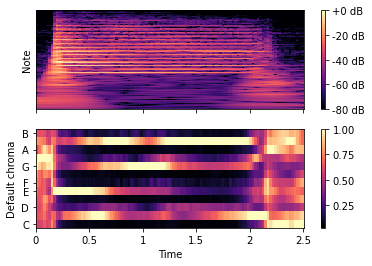

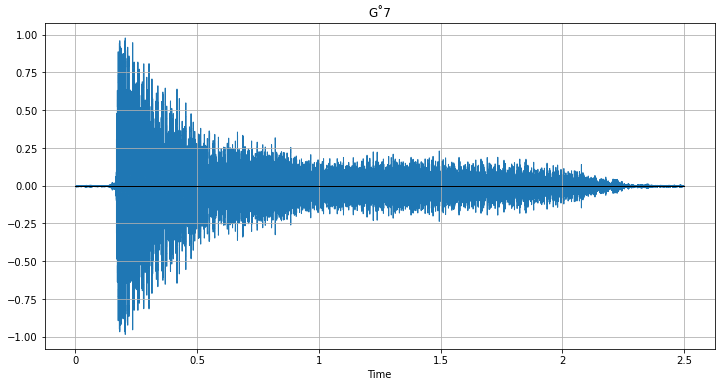

In [31]:
c24 = x[int(85*SR):int(87.5*SR)]

displayChroma(y = c24)

displaySignal(c24, title="G˚7")
Audio(c24, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


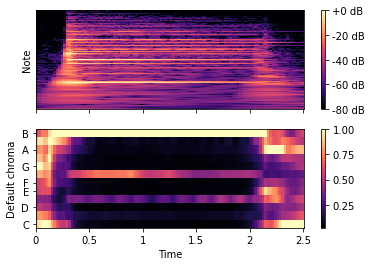

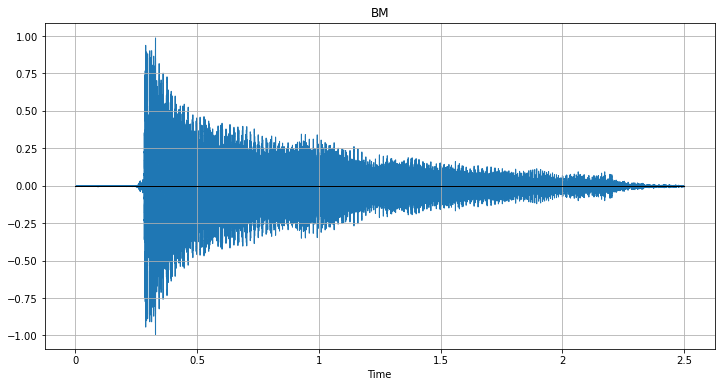

In [32]:
c25 = x[int(91*SR):int(93.5*SR)]

displayChroma(y = c25)

displaySignal(c25, title="BM")
Audio(c25, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=810
  warnings.warn(


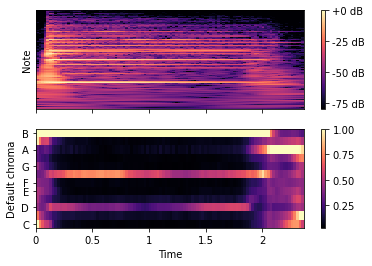

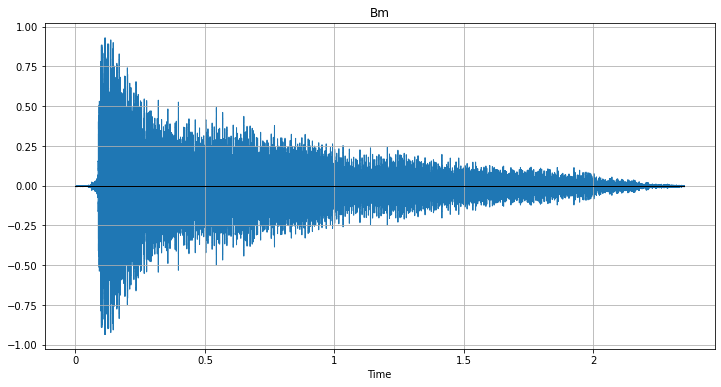

In [33]:
c26 = x[int(94.5*SR):int(96.85*SR)]

displayChroma(y = c26)

displaySignal(c26, title="Bm")
Audio(c26, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=914
  warnings.warn(


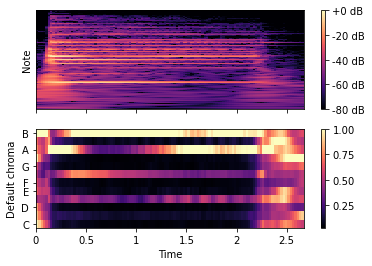

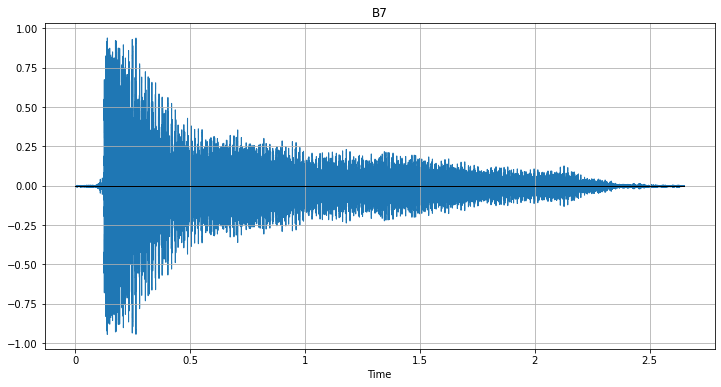

In [34]:
c27 = x[int(96.85*SR):int(99.5*SR)]

displayChroma(y = c27)

displaySignal(c27, title="B7")
Audio(c27, rate=sr)

C:\Users\julia\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


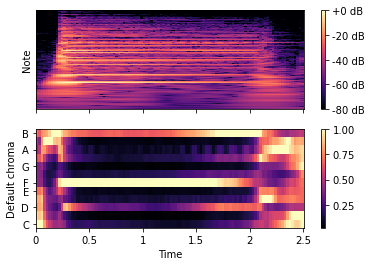

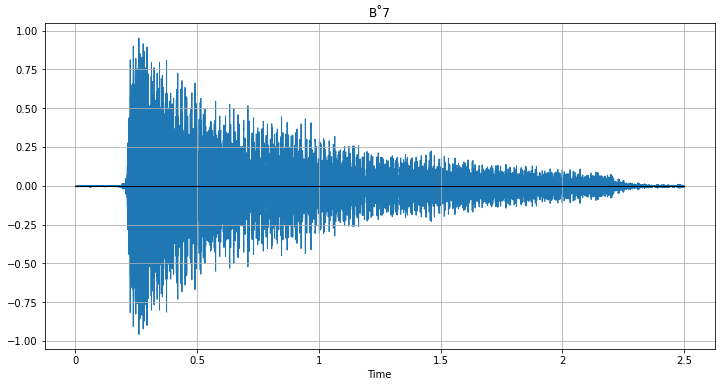

In [35]:
c28 = x[int(100*SR):int(102.5*SR)]

displayChroma(y = c28)

displaySignal(c28, title="B˚7")
Audio(c28, rate=sr)

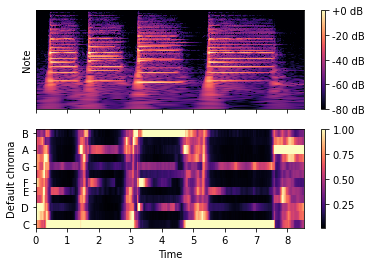

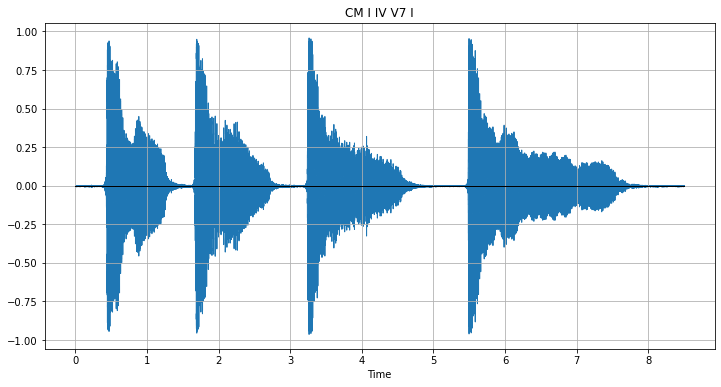

In [36]:
cp29 = x[int(141*SR):int(149.5*SR)]

displayChroma(y = cp29)

displaySignal(cp29, title="CM I IV V7 I")
Audio(cp29, rate=sr)

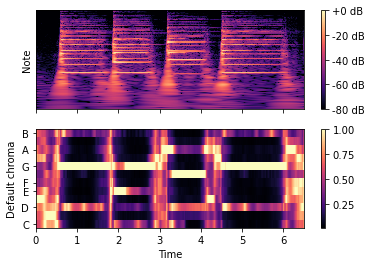

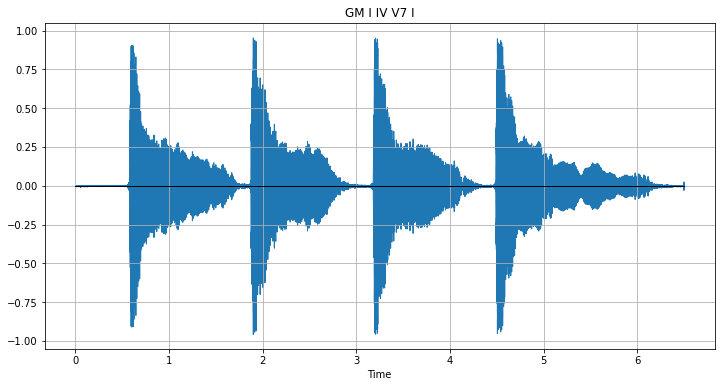

In [37]:
cp30 = x[int(150*SR):int(156.5*SR)]

displayChroma(y = cp30)

displaySignal(cp30, title="GM I IV V7 I")
Audio(cp30, rate=sr)